In [1]:
import pandas as pd
import requests
import json
import csv

In [2]:
url=" https://data.bts.gov/resource/crem-w557.json?$where=auto_sales!=0"

In [3]:
print(requests.get(url))

<Response [200]>


In [4]:
response = requests.get(url)
response_json = response.json()
auto_sales_df=pd.DataFrame(response_json)
recent_sales=auto_sales_df.tail(77)
recent_sales=recent_sales[["date","auto_sales","heavy_truck_sales","light_truck_sales"]]
recent_sales.head()

,date,auto_sales,heavy_truck_sales,light_truck_sales
576,2015-01-01T00:00:00.000,515400.0,30700.0,632300.0
577,2015-02-01T00:00:00.000,558200.0,31300.0,696300.0
578,2015-03-01T00:00:00.000,717500.0,38000.0,824900.0
579,2015-04-01T00:00:00.000,646400.0,36200.0,797800.0
580,2015-05-01T00:00:00.000,748000.0,37100.0,884500.0


In [5]:
recent_sales['date']=recent_sales['date'].str.slice(0,4)
recent_sales.head()

,date,auto_sales,heavy_truck_sales,light_truck_sales
576,2015,515400.0,30700.0,632300.0
577,2015,558200.0,31300.0,696300.0
578,2015,717500.0,38000.0,824900.0
579,2015,646400.0,36200.0,797800.0
580,2015,748000.0,37100.0,884500.0


In [6]:
#recent_sales=pd.to_numeric(recent_sales['date'],downcast="int")
recent_sales['auto_sales']=pd.to_numeric(recent_sales['auto_sales'],downcast="float")
#recent_sales=pd.to_numeric(recent_sales['heavy_truck_sales'],downcast="float")
#recent_sales=pd.to_numeric(recent_sales['light_truck_sales'],downcast="float")

recent_sales.head()
#recent_sales.groupby(recent_sales['date']).mean()

,date,auto_sales,heavy_truck_sales,light_truck_sales
576,2015,515400.0,30700.0,632300.0
577,2015,558200.0,31300.0,696300.0
578,2015,717500.0,38000.0,824900.0
579,2015,646400.0,36200.0,797800.0
580,2015,748000.0,37100.0,884500.0


In [7]:
av_monthly_sales=recent_sales.groupby(recent_sales['date']).mean()

In [8]:
av_monthly_sales.rename(columns = {"auto_sales":"average monthly sales"},inplace=True)
av_monthly_sales.reset_index()
#info from US Department of Transportation

,date,average monthly sales
0,2015,627375.00000
1,2016,573600.00000
2,2017,507433.34375
3,2018,442516.65625
4,2019,393316.65625
5,2020,283483.34375
6,2021,322560.00000


In [76]:
url="https://data.bts.gov/resource/crem-w557.json"
print(requests.get(url))

<Response [200]>


In [77]:
response = requests.get(url)
response_json = response.json()
auto_sales_df=pd.DataFrame(response_json)


In [78]:
transport_df=auto_sales_df[["date","system_use_u_s_airline",
                           "passenger_rail_passengers",
                           "transportation_economic_2",
                           "system_use_transit_ridership_1",
                          "system_use_transit_ridership",
                          "transportation_economic",
                          "auto_sales_saar_millions"]
                          ]

transport_df=transport_df.dropna()

In [79]:
transport_df['date']=transport_df['date'].str.slice(0,10)
transport_df=transport_df.rename(columns={"system_use_u_s_airline":"Domestic Flights",
                           "passenger_rail_passengers":"Passenger Rail Passengers",
                           "transportation_economic_2":"Personal Spending on Transportation Services",
                           "system_use_transit_ridership_1":"Use on Fixed Bus Routes",
                          "system_use_transit_ridership":"Use on Urban Rail",
                          "transportation_economic":"Personal Spending on Motor Vehicles and Parts",
                          "auto_sales_saar_millions":"Auto Sales in Millions"})

In [80]:
#Quarterly Transportation Data
transport_df

,date,Domestic Flights,Passenger Rail Passengers,Personal Spending on Transportation Services,Use on Fixed Bus Routes,Use on Urban Rail,Personal Spending on Motor Vehicles and Parts,Auto Sales in Millions
840,2017-01-01,61280000.0,2330923.0,411206000000.0,379032287.0,385406234.0,500251000000.00006,6272000.0
843,2017-04-01,61210000.0,2764389.0,414624999999.99994,388066756.0,407072908.0,502296000000.0,6225000.0
846,2017-07-01,62060000.0,3012988.0,422094000000.0,361210003.0,388539014.0,515366000000.0,5964000.0
849,2017-10-01,62990000.0,2788447.0,431766000000.0,425403015.0,444700375.0,534119000000.00006,6232000.0
852,2018-01-01,63450000.0,2308715.0,440842000000.0,369920847.0,381378921.0,530979000000.00006,5467000.0
855,2018-04-01,64650000.00000001,2595973.0,436870000000.0,392252372.0,398115089.0,536407000000.00006,5330000.0
858,2018-07-01,65180000.00000001,3063808.0,432812999999.99994,362119816.0,394287833.0,535746000000.0,5179000.0
861,2018-10-01,65560000.0,2809806.0,432252999999.99994,437208668.0,443479335.0,537098000000.0,5573000.0
864,2019-01-01,65640000.0,2288770.0,434827000000.00006,367851089.0,368022820.0,520592999999.99994,5251000.0
867,2019-04-01,67040000.00000001,2728995.0,439804999999.99994,397479345.0,415533810.0,534615000000.00006,4807000.0


In [37]:
file="Lockdown_days.csv"
lockdown_df=pd.read_csv(file)
lockdown_df=lockdown_df[['State/territory',
                         'State of emergency declared',
                         'Stay at home ordered',
                        'Face coverings required in public',
                        'Gatherings banned']]
lockdown_df.head(57)


,State/territory,State of emergency declared,Stay at home ordered,Face coverings required in public,Gatherings banned
0,Alabama,13-Mar,4-Apr,Yes,10 or more
1,Alaska,11-Mar,28-Mar,No,10 or more
2,American Samoa,29-Jan,No,No,10 or more
3,Arizona,11-Mar,31-Mar,No,50 or more
4,Arkansas,11-Mar,No,Yes,10 or more
5,California(government response),4-Mar,19-Mar,Yes,All
6,Colorado,10-Mar,26-Mar,Yes,10 or more
7,Connecticut,10-Mar,23-Mar,Yes,All
8,Delaware,12-Mar,24-Mar,Yes,All
9,District of Columbia,11-Mar,30-Mar,Yes,10 or more


In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
travel_habits_df=transport_df.set_index('date')
th=travel_habits_df.astype('float',copy=True)

th.head()

,Domestic Flights,Passenger Rail Passengers,Personal Spending on Transportation Services,Use on Fixed Bus Routes,Use on Urban Rail,Personal Spending on Motor Vehicles and Parts,Auto Sales in Millions
date,,,,,,,
2017-01-01,61280000.0,2330923.0,4.112060e+11,379032287.0,385406234.0,5.002510e+11,6272000.0
2017-04-01,61210000.0,2764389.0,4.146250e+11,388066756.0,407072908.0,5.022960e+11,6225000.0
2017-07-01,62060000.0,3012988.0,4.220940e+11,361210003.0,388539014.0,5.153660e+11,5964000.0
2017-10-01,62990000.0,2788447.0,4.317660e+11,425403015.0,444700375.0,5.341190e+11,6232000.0
2018-01-01,63450000.0,2308715.0,4.408420e+11,369920847.0,381378921.0,5.309790e+11,5467000.0


In [127]:
dates=th.index
flights=th['Domestic Flights']
passenger_trains = th['Passenger Rail Passengers']
urban_rail = th['Use on Urban Rail']
bus = th['Use on Fixed Bus Routes']


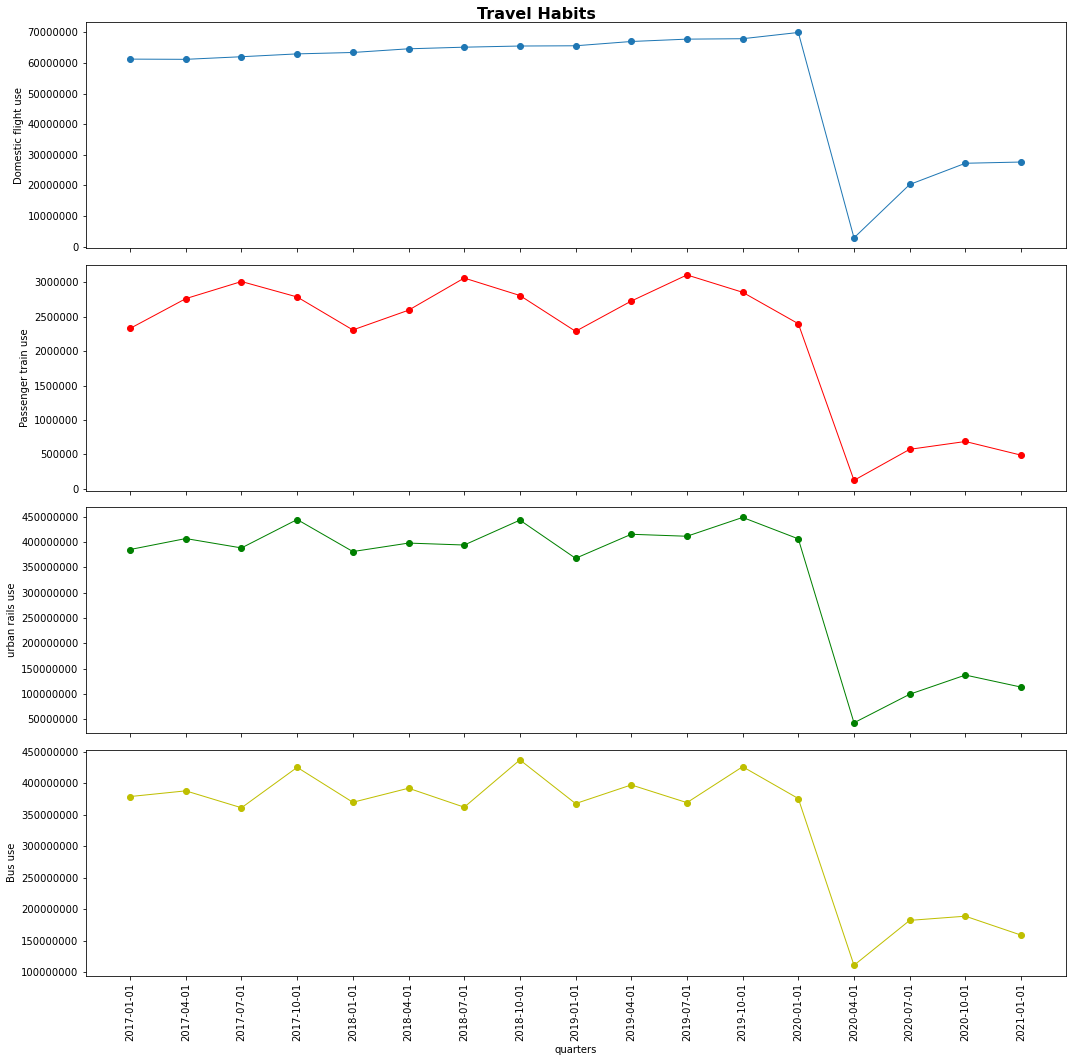

In [241]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(15,15))
fig.suptitle("Travel Habits", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)

ax1.plot(dates, flights, linewidth=1, marker="o")
ax1.ticklabel_format(style='plain', useOffset=False, axis='y')
ax1.set_ylabel("Domestic flight use")

ax2.plot(dates, passenger_trains, linewidth=1, marker="o", color="r")
ax2.ticklabel_format(style='plain', useOffset=False, axis='y')
ax2.set_ylabel("Passenger train use")

ax3.plot(dates, urban_rail, linewidth=1, marker="o", color="g")
ax3.ticklabel_format(style='plain', useOffset=False, axis='y')
ax3.set_ylabel("urban rails use")
#ax3.set_xlabel("quarters")

ax4.plot(dates, bus, linewidth=1, marker="o", color="y")
ax4.ticklabel_format(style='plain', useOffset=False, axis='y')
ax4.set_ylabel("Bus use")
ax4.set_xlabel("quarters")
plt.tight_layout()

plt.show()

AttributeError: 'Series' object has no attribute 'get_label'

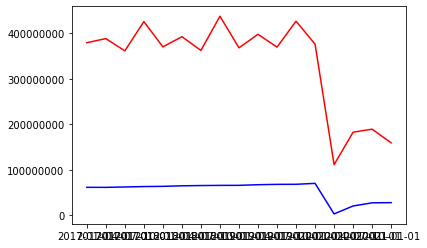

In [139]:
plt.plot(dates, flights, color="blue", label="Use on Domestic Flights" )
plt.ticklabel_format(style='plain', useOffset=False, axis='y') 
plt.plot(dates, bus, color="red", label="Use of Fixed Bus Routes" )
plt.ticklabel_format(style='plain', useOffset=False, axis='y') 
#passenger_trains = plt.plot(travel_habits_df['date'], travel_habits_df['Passenger Rail Passengers'], color="green", label="Use on Passenger Rail" )

#urban_rail = plt.plot(quarters, transport_df['Use on Urban Rail'], color="red", label="Use on Urban Rail" )

#bus = plt.plot(quarters, transport_df['Use on Fixed Bus Routes'], color="yellow", label="Use on Fixed Bus Routes" )


plt.legend(handles=[flights,# passenger_trains, urban_rail, 
                    bus
                   ], loc="best")

#plt.axes.Axes.set_ylim(ymin=2000000,ymax=71500000)
# Show the chart
plt.xticks(rotation=45)
plt.show()
                                          
#date	Domestic Flights	Passenger Rail Passengers	Personal Spending on Transportation Services	Use on Fixed Bus Routes	Use on Urban Rail	Personal Spending on Motor Vehicles and Parts	Auto Sales in Millions

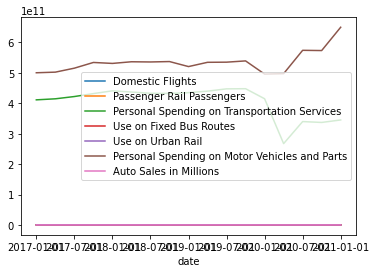

In [216]:
file2="../csv/applemobilitytrends-2021-07-28.csv"
mobility_df=pd.read_csv(file2)
#mobility_df.columns
us_mobility_df=mobility_df.loc[mobility_df['region']=='United States']
us_mobility_df=us_mobility_df.set_index('transportation_type')
#us_mobility_df.to_csv('/Users/owner/Desktop/DataClass/Project 1/Car_Dealership/csv/us_mobility.csv')
clean_us_mobility_df=us_mobility_df.drop(['geo_type','region','alternative_name','country','sub-region'],1)
clean_us_mobility_df=clean_us_mobility_df.T
clean_us_mobility_df=clean_us_mobility_df.astype('float')
clean_us_mobility_df=clean_us_mobility_df.reset_index()
clean_us_mobility_df['index']=pd.to_datetime(clean_us_mobility_df['index'])
clean_us_mobility_df=clean_us_mobility_df.rename(columns={'index':'date'})
clean_us_mobility_df

/Users/owner/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


transportation_type,date,driving,transit,walking
0,2020-01-13,100.00,100.00,100.00
1,2020-01-14,102.97,97.77,99.59
2,2020-01-15,105.19,98.84,101.87
3,2020-01-16,108.48,99.04,100.60
4,2020-01-17,125.51,108.03,121.36
...,...,...,...,...
558,2021-07-24,180.94,109.94,219.84
559,2021-07-25,143.50,89.38,154.41
560,2021-07-26,153.15,97.73,158.85
561,2021-07-27,154.95,97.60,160.81


No handles with labels found to put in legend.


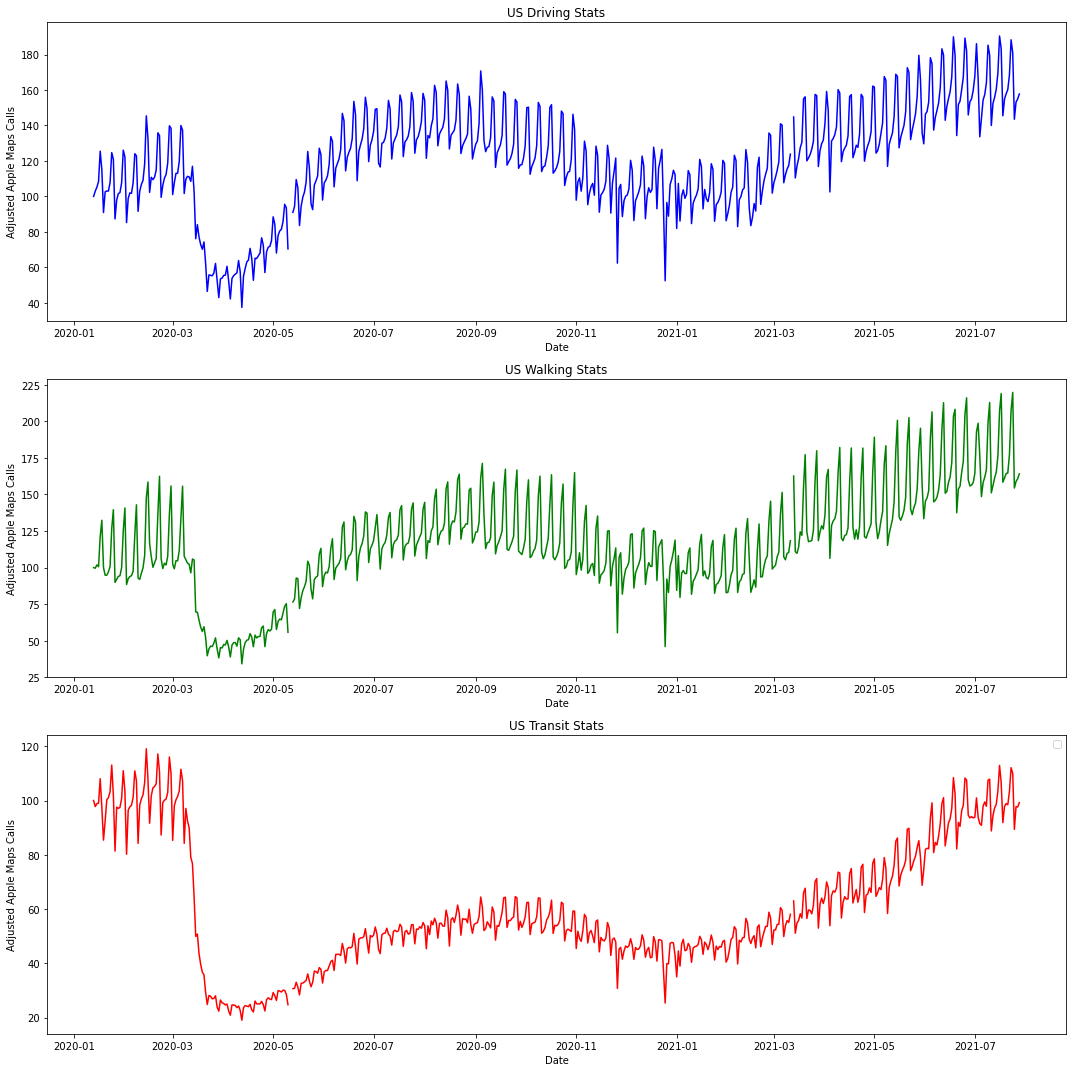

In [227]:
import matplotlib.dates as mdates
f, axs = plt.subplots(3,1,figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(clean_us_mobility_df['date'],clean_us_mobility_df['driving'],'b')
plt.xlabel('Date')
plt.ylabel('Adjusted Apple Maps Calls')
plt.title('US Driving Stats')

plt.subplot(3,1,2)
plt.plot(clean_us_mobility_df['date'],clean_us_mobility_df['walking'],'g')
plt.xlabel('Date')
plt.ylabel('Adjusted Apple Maps Calls')
plt.title('US Walking Stats')

plt.subplot(3,1,3)
plt.plot(clean_us_mobility_df['date'],clean_us_mobility_df['transit'],'r')
plt.xlabel('Date')
plt.ylabel('Adjusted Apple Maps Calls')
plt.title('US Transit Stats')
#clean_us_mobility_df[['driving','transit','walking']].plot(label="US Mobility Trends")
#plt.xticks([])
#fmt_quarter_year = mdates.MonthLocator(interval=4)
#ax.xaxis.set_major_locator(fmt_quarter_year)
plt.tight_layout()

#f.set_figheight(15)
#f.set_figwidth(15)
#average_unemployment.plot(label="World Average")
#combined_unemployed_data.loc['USA', "2010":"2014"].plot(label="United States")
plt.legend()
plt.show()

In [176]:
file3="../csv/us_mobility_grouped.csv"
usacsv_df=pd.read_csv(file3)
usa_df=usacsv_df[['Date','driving','transit','walking']]
#,'% change driving','% change walking','% change transit']]
usa_df

,Date,driving,transit,walking
0,2020-01-31,2032.99,1883.63,2004.91
1,2020-02-29,3315.22,2967.19,3310.80
2,2020-03-31,2645.84,1838.73,2418.56
3,2020-04-30,1834.91,730.33,1507.28
4,2020-05-31,2819.08,926.55,2376.65
5,2020-06-30,3828.00,1337.47,3338.40
6,2020-07-31,4271.82,1586.25,3788.26
7,2020-08-31,4358.74,1693.77,4119.18
8,2020-09-30,4029.32,1702.05,3873.82
9,2020-10-31,3963.76,1742.73,3839.57


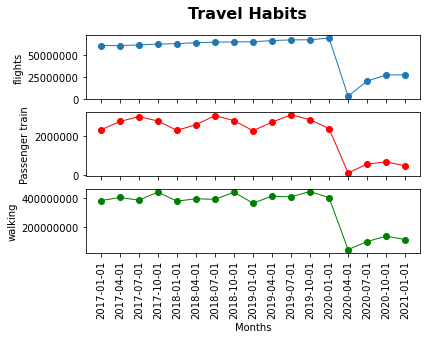

In [233]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Travel Habits", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)

ax1.plot(dates, flights, linewidth=1, marker="o")
ax1.ticklabel_format(style='plain', useOffset=False, axis='y')
ax1.set_ylabel("flights")

ax2.plot(dates, passenger_trains, linewidth=1, marker="o", color="r")
ax2.ticklabel_format(style='plain', useOffset=False, axis='y')
ax2.set_ylabel("Passenger train")

ax3.plot(dates, urban_rail, linewidth=1, marker="o", color="g")
ax3.ticklabel_format(style='plain', useOffset=False, axis='y')
ax3.set_ylabel("walking")
ax3.set_xlabel("Months")



plt.show()